In [35]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

In [36]:
with open('data/san-pedro.pkl', 'rb') as file:
    df = pickle.load(file)

In [38]:
scalter = StandardScaler()

scaled_df = pd.DataFrame(scalter.fit_transform(df),
                         columns=df.columns,
                         index=df.index)

Text(0.5, 0, 'Component')

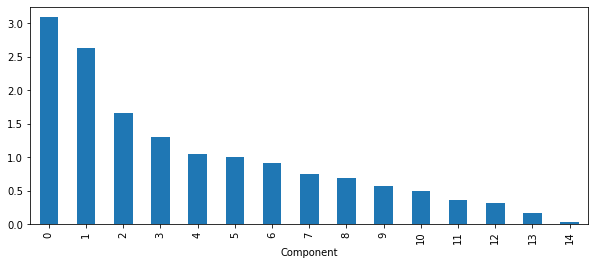

In [39]:
pca = PCA()
pca.fit(scaled_df)

loadings = pd.DataFrame(pca.components_, columns=scaled_df.columns)

explained_variance = pd.DataFrame(pca.explained_variance_)
ax = explained_variance.plot.bar(legend=False, figsize=(10, 4))
ax.set_xlabel('Component')

In [76]:
sum(pca.explained_variance_ratio_[:7])

0.7758699211018906

Text(0, 0.5, 'Variance Explained')

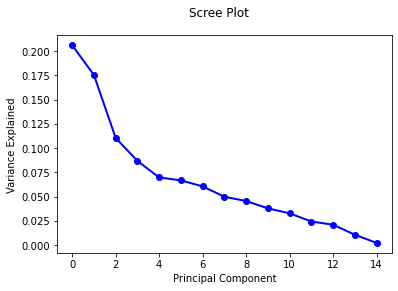

In [43]:
fig, ax = plt.subplots()

ax.plot(pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')

fig.suptitle('Scree Plot')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Variance Explained')

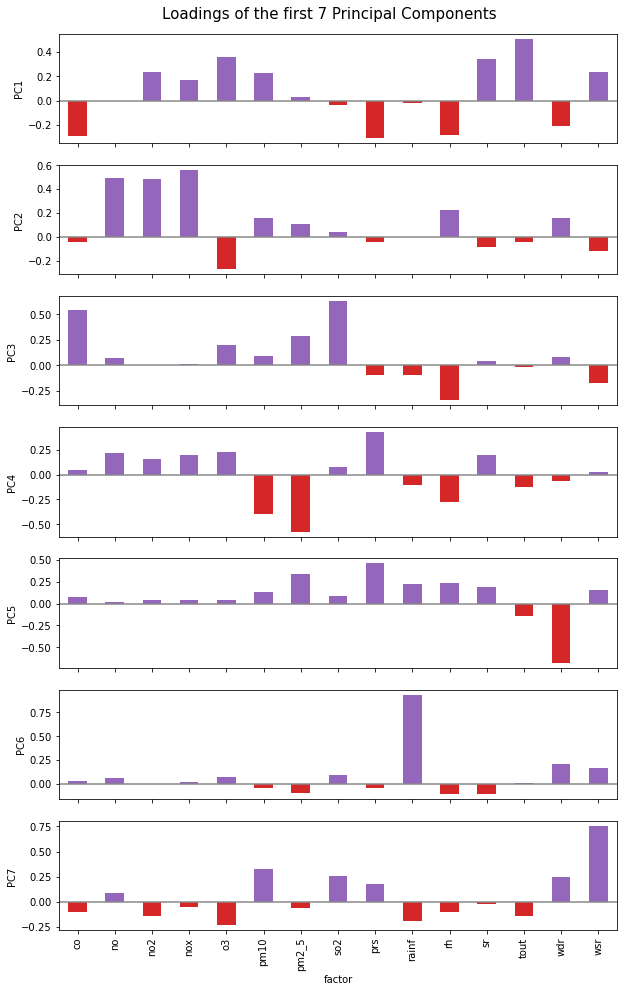

In [73]:
n_components = 7
loadings = pd.DataFrame(pca.components_[:n_components, :], columns=df.columns)

fig, axes = plt.subplots(n_components, 1, figsize=(10, 15), sharex=True)
for i, ax in enumerate(axes):
    pc_loadings = loadings.loc[i, :]
    colors = ['C4' if l > 0 else 'C3' for l in pc_loadings]
    ax.axhline(color='#888888')
    pc_loadings.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'PC{i+1}')

_ = fig.suptitle(f'Loadings of the first {n_components} Principal Components', fontsize=15)
fig.subplots_adjust(top=0.955)